Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Phase 2 Project

### Importing Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#### Formatting Cell

In [3]:
pd.set_option('display.max_rows', 1000) #change the amount of rows displayed

In [4]:
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Column Names and descriptions for Kings County Data Set
(source: Data/column_names.md)
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors
D

## Data Cleaning

### Resetting IDs to make them shorter

In [5]:
df = df.reset_index()
df = df.rename(columns={"index":"new_id"})
df

,new_id,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### Dropping Uncessary Columns

In [6]:
df = df.drop(df[['id', 'date', 'view', 'lat', 'long', 'yr_renovated', 'sqft_living15', 'sqft_lot15']], axis=1)
df.head()

,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125
2,2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074


### Checking Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   new_id         21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 2.3+ MB


#### Need to deal with the ? in sqft_basement

In [8]:
basement_size = df['sqft_basement'].value_counts()
basement_size

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
360.0        72
910.0        71
940.0        71
770.0        71
1200.0       69
440.0        69
880.0        69
290.0        69
350.0        68
520.0        68
630.0        66
920.0        66
960.0        65
730.0        65
430.0        64
740.0        64
760.0        63
1010.0       63
640.0        63
560.0        62
820.0        62
280.0        62
340.0        62
950.0        62
570.0        62
790.0        61
460.0        61
1060.0       58
310.0        58
980.0        57
830.0        56
1040.0       55
540.0   

In [9]:
unknown_basements = df[df['sqft_basement'] == '?']
known_basements = df[df['sqft_basement'] != '?']

print(len(unknown_basements))
print(len(known_basements))

454
21143


In [10]:
sqft_basement = unknown_basements.apply(lambda x: x['sqft_living'] - x['sqft_above'], axis=1)
unknown_basements['sqft_basement'] = sqft_basement
unknown_basements.head()

<ipython-input-10-1aa7a46566a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_basements['sqft_basement'] = sqft_basement


,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
6,6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,0,1995,98003
18,18,189000.0,2,1.00,1200,9850,1.0,0.0,4,7,1200,0,1921,98002
42,42,861990.0,5,2.75,3595,5639,2.0,0.0,3,9,3595,0,2014,98053
79,79,720000.0,4,2.50,3450,39683,2.0,0.0,3,10,3450,0,2002,98010
112,112,272500.0,3,1.75,1540,12600,1.0,0.0,4,7,1160,380,1980,98038


In [11]:
cleaned_df = known_basements.append(unknown_basements)
cleaned_df.head()

,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125
2,2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074


In [12]:
#changing to float so that decminals are in the same format
cleaned_df['sqft_basement'] = cleaned_df['sqft_basement'].astype(float)
cleaned_df['sqft_above'] = cleaned_df['sqft_above'].astype(float)

In [13]:
cleaned_df['sqft_basement'].value_counts().head()

0.0      13110
600.0      221
700.0      218
500.0      214
800.0      206
Name: sqft_basement, dtype: int64

In [14]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21581
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   new_id         21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.5 MB


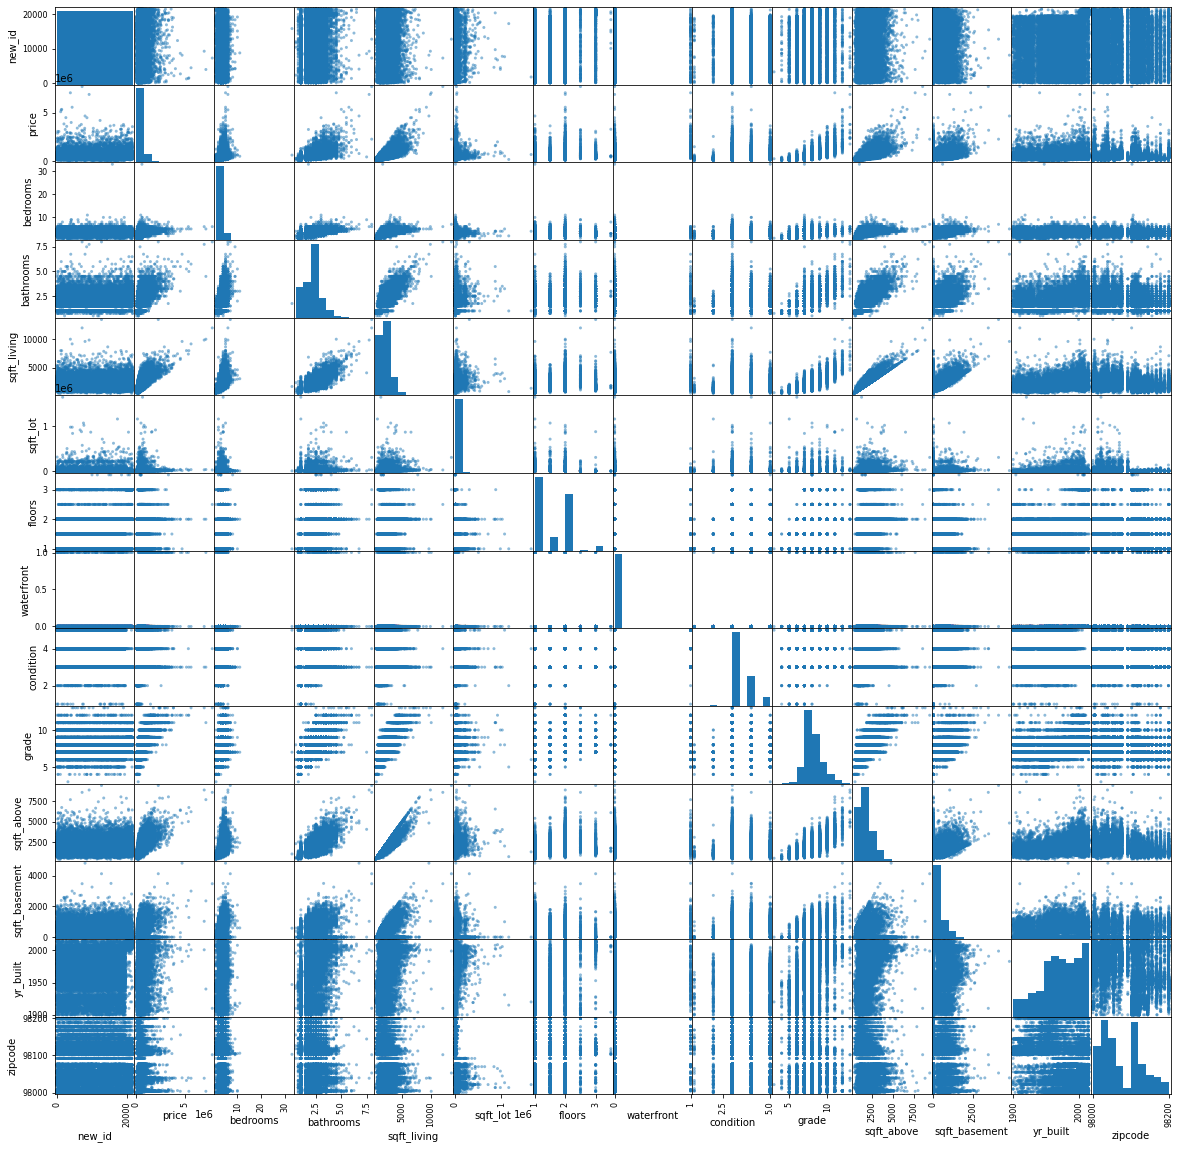

In [15]:
#using scatter plot to look for linear relationships
pd.plotting.scatter_matrix(cleaned_df, figsize = [20,20]);
plt.show()

### Analysis:
At first glance, the following variables seem to have linear relationships:
- price with bedrooms, sqft_above, & sqft_basement.
    - price also seems to have a linear relationship with categorical variable 'grade'.
- bedrooms with bathrooms, sqft_living, sqft_above, & sqft_basement
- sqft_living and sqft_above have the closest linear relationship
    - They are very similar data points. I may need to eliminate one to prevent multicolinearity.
    
And the Following Variables seem to be categorical:
- rooms
- condition
- grade
- and waterfront


## Checking for Null Values

In [16]:
cleaned_df.isna().sum()

new_id              0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
dtype: int64

In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21581
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   new_id         21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.5 MB


## Fixing Waterfront

In [18]:
cleaned_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [19]:
waterfront_cleaned = cleaned_df['waterfront'].fillna(0) 

In [20]:
cleaned_df['waterfront'] = waterfront_cleaned

In [21]:
cleaned_df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [22]:
cleaned_df.isna().sum()

new_id           0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
dtype: int64

# Test Model with no scaling/etc

In [23]:
test_df = cleaned_df
#test_df.head()

In [24]:
X = test_df.drop('price', axis=1)
y = test_df['price']

In [25]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3288.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:30:41   Log-Likelihood:            -2.9617e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21584   BIC:                         5.925e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.113e+06   3.11e+06      1.967      0.049    2.16e+04    1.22e+07
new_id            1.3835      0.245      5.639      0.000       0.903       1.864
bedrooms       -4.23e+04   2052.808    -20.605      0.000   -4.63e+04   -3.83e+04
bathrooms      4.846e+04   3511.361     13.800      0.000    4.16e+04    5.53e+04
sqft_living     120.4064      2.289     52.607      0.000     115.920     124.893
sqft_lot         -0.2230      0.037     -6.014      0.000      -0.296      -0.150
floors          2.41e+04   3861.372      6.242      0.000    1.65e+04    3.17e+04
waterfront     7.532e+05   1.84e+04     41.025      0.000    7.17e+05    7.89e+05
condition      1.864e+04   2512.304      7.421      0.000    1.37e+04    2.36e+04
grade          1.312e+05   2176.781     60.290      0.000    1.27e+05    1.36e+05
sqft_above       52.8118      2.241     23.565      0.000      48.419      57.205
sqft_basement    67.5949      2.794     24.189      0.000      62.118      73.072
yr_built      -3855.3696     71.795    -53.699      0.000   -3996.094   -3714.645
zipcode           5.9200     31.179      0.190      0.849     -55.193      67.033
==============================================================================
Omnibus:                    15960.760   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1039542.397
Skew:                           2.962   Prob(JB):                         0.00
Kurtosis:                      36.468   Cond. No.                     3.46e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Test Normalization

In [26]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [27]:
data= test_df
data.head()

,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180.0,0.0,1955,98178
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170.0,400.0,1951,98125
2,2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770.0,0.0,1933,98028
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050.0,910.0,1965,98136
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680.0,0.0,1987,98074


In [28]:
df_norm = norm_feat(data)
df_norm.head()

,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,-1.731931,-0.866696,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,-0.082498,-0.629972,-0.560787,-0.735234,-0.659016,-0.544665,1.869602
1,-1.731770,-0.006251,-0.402894,0.174482,0.533357,-0.189735,0.937409,-0.082498,-0.629972,-0.560787,0.460766,0.244596,-0.680835,0.879190
2,-1.731610,-0.980751,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,-0.082498,-0.629972,-1.413157,-1.230546,-0.659016,-1.293596,-0.933451
3,-1.731449,0.173405,0.676671,1.149794,-0.131054,-0.243873,-0.915531,-0.082498,2.444371,-0.560787,-0.892284,1.396702,-0.204243,1.084747
4,-1.731289,-0.082469,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,-0.082498,-0.629972,0.291583,-0.131194,-0.659016,0.544688,-0.073848


## Test Model with Test Normalized Data

In [29]:
X = df_norm.drop('price', axis=1)
y = df_norm['price']

In [31]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3288.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:31:13   Log-Likelihood:                -19419.
No. Observations:               21597   AIC:                         3.886e+04
Df Residuals:                   21584   BIC:                         3.897e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.716e-15      0.004   1.17e-12      1.000      -0.008       0.008
new_id            0.0235      0.004      5.639      0.000       0.015       0.032
bedrooms         -0.1067      0.005    -20.605      0.000      -0.117      -0.097
bathrooms         0.1014      0.007     13.800      0.000       0.087       0.116
sqft_living       0.2254      0.004     53.121      0.000       0.217       0.234
sqft_lot         -0.0251      0.004     -6.014      0.000      -0.033      -0.017
floors            0.0354      0.006      6.242      0.000       0.024       0.047
waterfront        0.1680      0.004     41.025      0.000       0.160       0.176
condition         0.0330      0.004      7.421      0.000       0.024       0.042
grade             0.4191      0.007     60.290      0.000       0.405       0.433
sqft_above        0.1870      0.004     41.644      0.000       0.178       0.196
sqft_basement     0.1178      0.004     26.271      0.000       0.109       0.127
yr_built         -0.3083      0.006    -53.699      0.000      -0.320      -0.297
zipcode           0.0009      0.005      0.190      0.849      -0.008       0.010
==============================================================================
Omnibus:                    15960.760   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1039542.397
Skew:                           2.962   Prob(JB):                         0.00
Kurtosis:                      36.468   Cond. No.                     2.60e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Data Exploration

## Building Condition Explaination
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#d (accessed 12/6/2021)

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.


In [30]:
cleaned_df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

## Building Grade Explaination
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#d (accessed 12/6/2021)


Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

## Should I Drop Low Grade Houses?

In [ ]:
cleaned_df['grade'].value_counts()

I am only concerned with houses that currently meet the building code, so I will drop the houses which are grade 5 or lower

In [ ]:
low_grade = cleaned_df[cleaned_df['grade'] <= 5]
low_grade.head()

In [ ]:
low_grade['condition'].value_counts()

In [ ]:
low_grade['waterfront'].value_counts()

## Drop bedroom outliers?

In [32]:
cleaned_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
#dropping outliers
cleaned_df = cleaned_df.sort_values('bedrooms', ascending=False).reset_index()
cleaned_df = cleaned_df.drop([0,1,2,3,4])
cleaned_df.head(5)

## Checking for Multicolinearity

In [33]:
cleaned_df.head(1)

,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,0,221900.0,3,1.0,1180,5650,1.0,0.0,3,7,1180.0,0.0,1955,98178


In [34]:
#numeric variables
numeric_vars= ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
'condition', 'grade', 'sqft_above', 'sqft_basement']
numeric_vars

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement']

In [35]:
king_preprocessed = cleaned_df.loc[:,numeric_vars]
king_preprocessed.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,0.0,3,7,1180.0,0.0
1,3,2.25,2570,7242,2.0,0.0,3,7,2170.0,400.0
2,2,1.00,770,10000,1.0,0.0,3,6,770.0,0.0
3,4,3.00,1960,5000,1.0,0.0,5,7,1050.0,910.0
4,3,2.00,1680,8080,1.0,0.0,3,8,1680.0,0.0


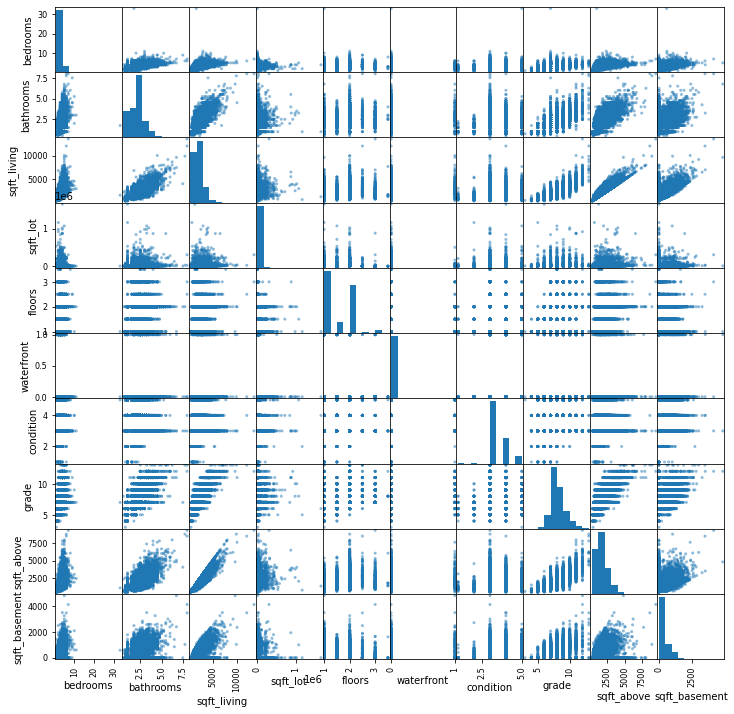

In [36]:
#scatter matrix for numeric variables
pd.plotting.scatter_matrix(king_preprocessed, figsize=[12, 12]);

In [37]:
#correlation matrix
king_preprocessed.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.479386,0.302808
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.686668,0.283440
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.876448,0.435130
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.184139,0.015418
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.523989,-0.245715
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,0.071778,0.082800
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.158904,0.173849
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.756073,0.168220
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,-0.158904,0.756073,1.000000,-0.052156
sqft_basement,0.302808,0.283440,0.435130,0.015418,-0.245715,0.082800,0.173849,0.168220,-0.052156,1.000000


In [38]:
abs(king_preprocessed.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
bedrooms,True,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False
grade,False,False,True,False,False,False,False,True,True,False
sqft_above,False,False,True,False,False,False,False,True,True,False
sqft_basement,False,False,False,False,False,False,False,False,False,True


In [39]:
cc_df = king_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

cc_df['pairs'] = list(zip(cc_df.level_0, cc_df.level_1))

cc_df.set_index(['pairs'], inplace = True)

cc_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
cc_df.columns = ['cc']

cc_df.drop_duplicates(inplace=True)

cc_df[(cc_df.cc>.75) & (cc_df.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758


I need to remove some of these variables to prevent multicolineartiy. 


### Multicollinearity Analysis

There are 4 sets of variables that are highly correlated.  

In [40]:
#removing these two variables removes all of the colinearity pairs
king_preprocessed.drop(columns=['sqft_above', 'sqft_living'], inplace=True)

In [41]:
#checking for correlated pairs again
cc_df = king_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

cc_df['pairs'] = list(zip(cc_df.level_0, cc_df.level_1))

cc_df.set_index(['pairs'], inplace = True)

cc_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
cc_df.columns = ['cc']

cc_df.drop_duplicates(inplace=True)

cc_df[(cc_df.cc>.75) & (cc_df.cc<1)]

,cc
pairs,


In [ ]:
king_preprocessed

## Normalizing Data

In [42]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [43]:
data = norm_feat(king_preprocessed)
data

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_basement
0,-0.402894,-1.451039,-0.228177,-0.915531,-0.082498,-0.629972,-0.560787,-0.659016
1,-0.402894,0.174482,-0.189735,0.937409,-0.082498,-0.629972,-0.560787,0.244596
2,-1.482459,-1.451039,-0.123137,-0.915531,-0.082498,-0.629972,-1.413157,-0.659016
3,0.676671,1.149794,-0.243873,-0.915531,-0.082498,2.444371,-0.560787,1.396702
4,-0.402894,-0.150622,-0.169499,-0.915531,-0.082498,-0.629972,0.291583,-0.659016
...,...,...,...,...,...,...,...,...
21442,1.756237,1.149794,-0.243873,-0.915531,-0.082498,-0.629972,-0.560787,1.532244
21447,0.676671,0.499586,-0.246118,0.937409,-0.082498,-0.629972,-0.560787,-0.659016
21473,-1.482459,0.499586,-0.340220,2.790349,-0.082498,-0.629972,0.291583,-0.659016
21519,0.676671,0.499586,-0.226076,0.937409,-0.082498,-0.629972,-0.560787,-0.659016


In [44]:
df_norm = norm_feat(data)
df_norm

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_basement
0,-0.402894,-1.451039,-0.228177,-0.915531,-0.082498,-0.629972,-0.560787,-0.659016
1,-0.402894,0.174482,-0.189735,0.937409,-0.082498,-0.629972,-0.560787,0.244596
2,-1.482459,-1.451039,-0.123137,-0.915531,-0.082498,-0.629972,-1.413157,-0.659016
3,0.676671,1.149794,-0.243873,-0.915531,-0.082498,2.444371,-0.560787,1.396702
4,-0.402894,-0.150622,-0.169499,-0.915531,-0.082498,-0.629972,0.291583,-0.659016
...,...,...,...,...,...,...,...,...
21442,1.756237,1.149794,-0.243873,-0.915531,-0.082498,-0.629972,-0.560787,1.532244
21447,0.676671,0.499586,-0.246118,0.937409,-0.082498,-0.629972,-0.560787,-0.659016
21473,-1.482459,0.499586,-0.340220,2.790349,-0.082498,-0.629972,0.291583,-0.659016
21519,0.676671,0.499586,-0.226076,0.937409,-0.082498,-0.629972,-0.560787,-0.659016


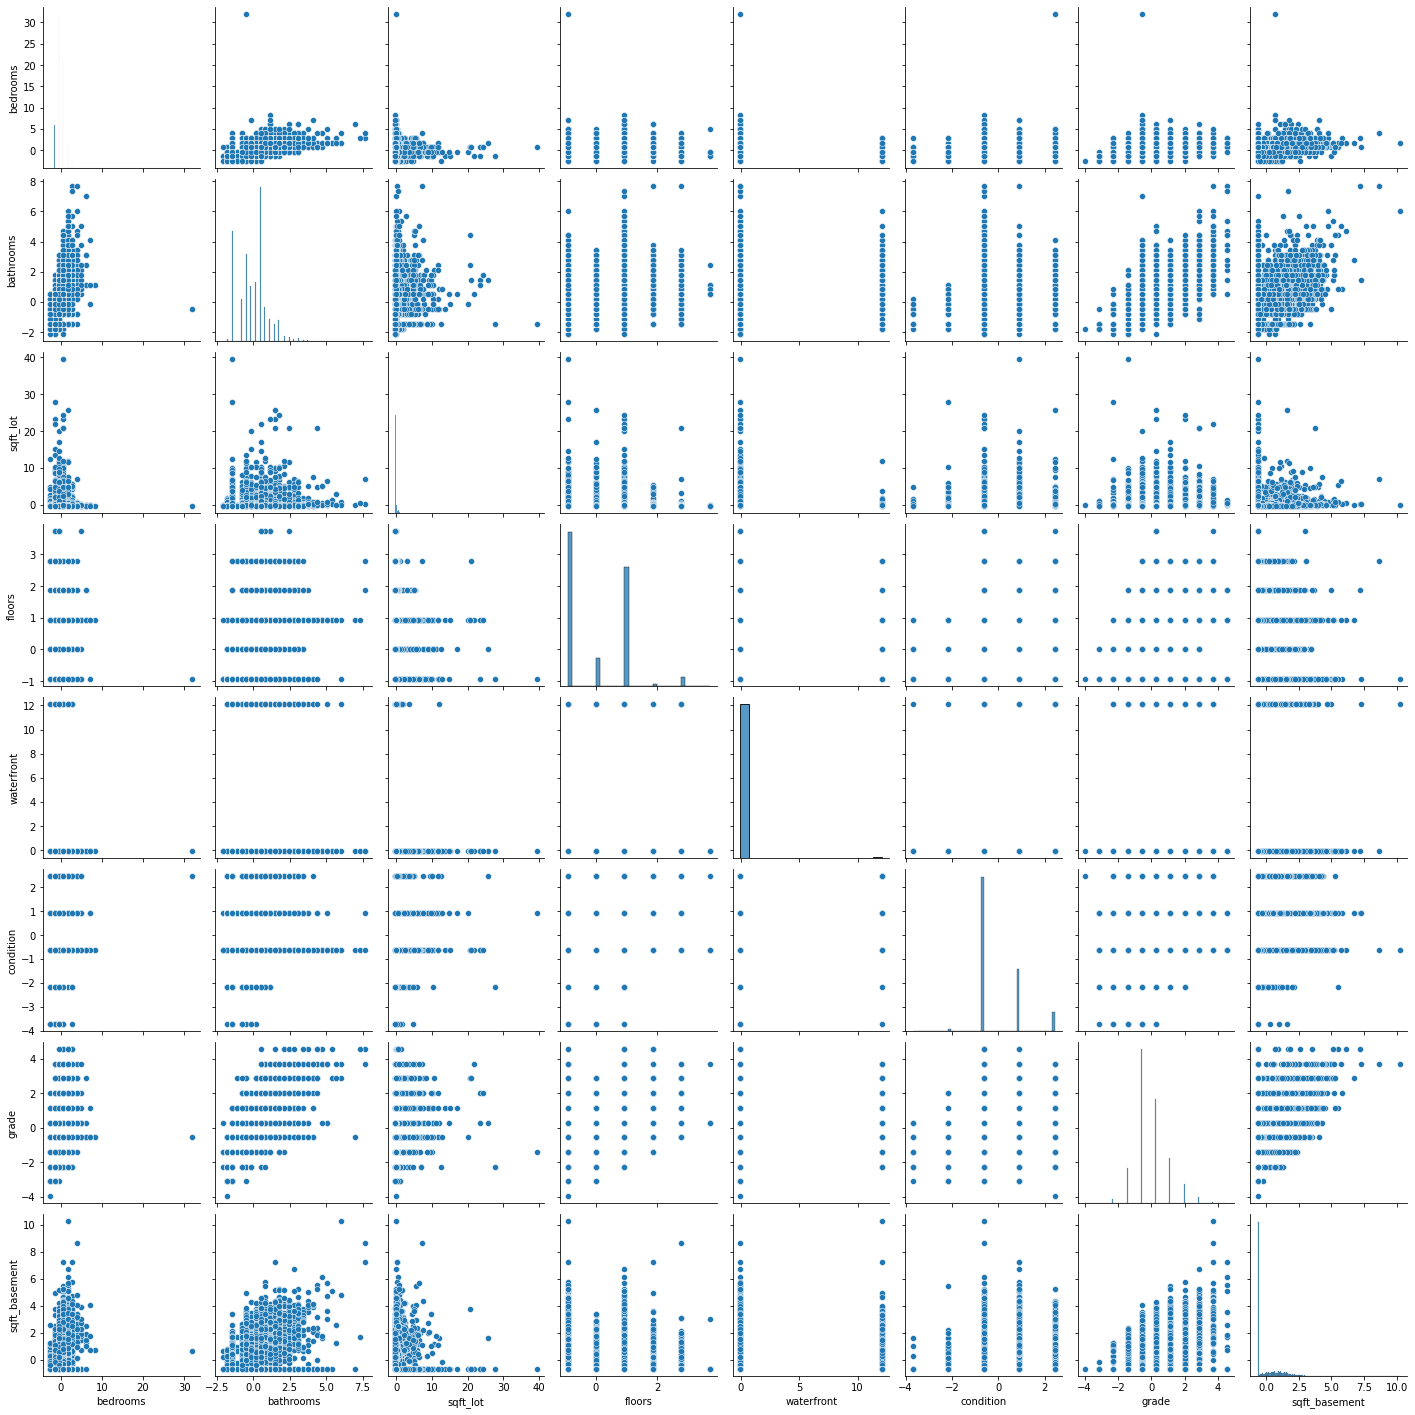

In [45]:
sns.pairplot(df_norm)

In [ ]:
#sns.heatmap(df_norm);

In [ ]:
#data_pred = df_norm

## Plotting Categoricals and then One-Hot Encoding them

In [46]:
categoricals = df_norm[['bedrooms', 'bathrooms', 'floors','condition', 'waterfront', 'grade']]

In [47]:
categoricals.head()

,bedrooms,bathrooms,floors,condition,waterfront,grade
0,-0.402894,-1.451039,-0.915531,-0.629972,-0.082498,-0.560787
1,-0.402894,0.174482,0.937409,-0.629972,-0.082498,-0.560787
2,-1.482459,-1.451039,-0.915531,-0.629972,-0.082498,-1.413157
3,0.676671,1.149794,-0.915531,2.444371,-0.082498,-0.560787
4,-0.402894,-0.150622,-0.915531,-0.629972,-0.082498,0.291583


In [51]:
king_preprocessed

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_basement
0,3,1.00,5650,1.0,0.0,3,7,0.0
1,3,2.25,7242,2.0,0.0,3,7,400.0
2,2,1.00,10000,1.0,0.0,3,6,0.0
3,4,3.00,5000,1.0,0.0,5,7,910.0
4,3,2.00,8080,1.0,0.0,3,8,0.0
...,...,...,...,...,...,...,...,...
21442,5,3.00,5000,1.0,0.0,3,7,970.0
21447,4,2.50,4907,2.0,0.0,3,7,0.0
21473,2,2.50,1010,3.0,0.0,3,8,0.0
21519,4,2.50,5737,2.0,0.0,3,7,0.0


NameError: name 'king_preproccessed' is not defined

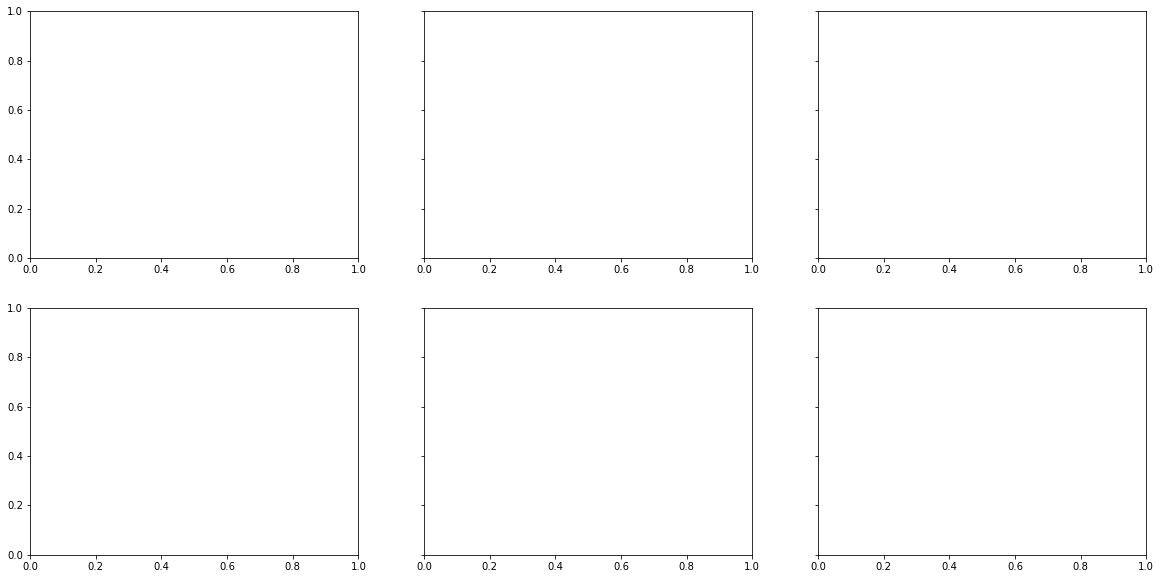

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10), sharey=True)

for col, ax in zip(categoricals, axes.flatten()):
    (king_preproccessed.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()


In [ ]:
sns.heatmap(categoricals)

In [ ]:
#correlation matrix. 
df.corr()

In [ ]:
df_pred_222 = abs(df.corr() > 0.75)

### One Hot Encoding

In [61]:
#feats = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']
#feats_df = king_preprocessed[feats]
#encoded_df = pd.get_dummies(feats_df, drop_first=True)
#encoded_df.head()

In [62]:
feats = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

df = df[feats]
df = pd.get_dummies(df, drop_first=True)

In [63]:
df

,bedrooms,bathrooms,floors,waterfront,condition,grade
0,3,1.00,1.0,NaN,3,7
1,3,2.25,2.0,0.0,3,7
2,2,1.00,1.0,0.0,3,6
3,4,3.00,1.0,0.0,5,7
4,3,2.00,1.0,0.0,3,8
...,...,...,...,...,...,...
21592,3,2.50,3.0,0.0,3,8
21593,4,2.50,2.0,0.0,3,8
21594,2,0.75,2.0,0.0,3,7
21595,3,2.50,2.0,NaN,3,8


In [60]:
pd.get_dummies(feats_df, )

,bedrooms,bathrooms,floors,waterfront,condition,grade
0,3,1.00,1.0,0.0,3,7
1,3,2.25,2.0,0.0,3,7
2,2,1.00,1.0,0.0,3,6
3,4,3.00,1.0,0.0,5,7
4,3,2.00,1.0,0.0,3,8
...,...,...,...,...,...,...
21442,5,3.00,1.0,0.0,3,7
21447,4,2.50,2.0,0.0,3,7
21473,2,2.50,3.0,0.0,3,8
21519,4,2.50,2.0,0.0,3,7


In [57]:
pd.get_dummies(king_preprocessed.grade)

,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21442,0,0,0,0,1,0,0,0,0,0,0
21447,0,0,0,0,1,0,0,0,0,0,0
21473,0,0,0,0,0,1,0,0,0,0,0
21519,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#trying sklearn method
ohe = OneHotEncoder(drop='first')

In [ ]:
king_preprocessed.head(1)

In [ ]:
data_trans = ohe.fit_transform(king_preprocessed)
data_trans.todense()

In [ ]:
data_trans = pd.DataFrame(data_trans.todense(), columns=ohe.get_feature_names())
data_trans.head()

# Modeling

# Archive

In [ ]:
#df['waterfront'].value_counts()

In [ ]:
#df['waterfront'] = df['waterfront'].astype('bool') #converting waterfront into boolean